# Exploring the Topic of Climate Change in Media Outlets

# Introduction

The goal of this project is to analyze how media outlets such as CNN, Fox News, and National Geographic cover the topic of climate change. Media plays a crucial role in shaping public opinion, especially on critical issues like climate change. By analyzing the language used in news articles published by these outlets, we can gain insight into their areas of focus and priorities when reporting on climate change and climate change-related issues.

By using Natural Language Processing (NLP) techniques, we aim to:

1. Identify the most frequently discussed topics and themes.
2. Extract and compare key entities (e.g., organizations, people, events).
3. Evaluate sentiment trends across different news outlets.

This project uses the following Python-based tools:

- spaCy: For Named Entity Recognition (NER) and text preprocessing.
- TextBlob: For sentiment analysis.
- Collections: For word frequency analysis.
- Matplotlib: For creating visualizations.
- Wordcloud: For creating visualizations.
  
We will preprocess and analyze three datasets, which consist of climate change articles from different media outlets: Fox News, CNN and National Geographic. The Python tools above will be applied to these datasets to gain insights into the reporting styles and priorities of each of the news outlets.

## Research Questions

To analyze differences in reporting styles and priorities of the different news outlets, we have come up with a few research questions to help guide us in our project.


**Research Question 1:**
What are the most frequently discussed topics in CNN, Fox News, and National Geographic articles about climate change?

_How we aim to answer this:_

Use word frequency analysis to count and rank the most common words in each dataset after preprocessing.
Then we compare the top words across datasets to identify each outlet’s focus (e.g., political terms for CNN, economic terms for Fox News, or scientific terms for National Geographic).

_Method:_
- Use Python's collections library to calculate word frequencies.
- Create visualizations to highlight differences.

**Research Question 2:**
Who are the key entities (e.g., people, organizations, events) discussed in the articles, and how do they differ across outlets?

_How we aim to answer this:_

Use spaCy's Named Entity Recognition (NER) to extract entities such as:
- People (Example: "Joe Biden," "Greta Thunberg")
- Organizations (Example: "United Nations")
- Events (Example: "Climate Summit")

Then we compare the frequency of entities across datasets to see which actors or topics each outlet emphasizes.

_Method:_

- Use spaCy to extract and categorize entities.
- Visualize to display entity frequencies.


**Research Question 3:** How does the sentiment (positive, neutral, or negative) of climate change coverage differ across CNN, Fox News, and National Geographic?

_How we aim to answer this:_

Use TextBlob to calculate sentiment polarity scores for each article in order to find average sentiment scores by outlet. Then, look for trends, such as whether certain outlets have consistently more positive or negative tones.
  
_Method:_

- Use TextBlob to compute sentiment scores.
- Plot graphs to show sentiment analysis for each source.

# Tutorial

### Step 1: Data Collection with Octoparse

Before we can get started with any analysis, we need to collect news articles, create datasets, inspect the datasets and preprocess them.

Using Octoparse, we scraped articles from three different news outlets.
Octoparse is a no-code web scraping tool which we used to extract articles from the websites of CNN, Fox News, and National Geographic. It allowed us to automate the collection of titles, publication dates, and content efficiently.

 To make sure we only scraped climate change related articles and not just any article from these websites, we scraped the search bar results of each website using the search term 'climate change'.

 Side note: the web-scraping was done in December 2024, which means that articles about the devastating wildfires in California, which have been extensively covered recently, are not included in our datasets.


For each article, the following fields were extracted:

1. Title: The headline of the article.
2. Date: The publication date.
3. Content: The full text of the article.

The scraped data were exported as CSV files for further analysis. The three datasets are named:

- CNN_Climate_Change.csv
- Fox_News_Climate_Change.csv
- National_Geographic_Climate_Change.csv

### Step 2: Data Loading and Inspection
Before we do any analysis, we first have to load the datasets and inspected their structure to make sure the data is structured correctly and to see if there are any missing fields or incorrect formats.

### Import Necessary Libraries

In [ ]:
# Import the necessary libraries
import pandas as pd
import spacy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

### Load the Datasets

In [ ]:
#Load the CNN dataset
cnn = pd.read_csv('CNN_Climate_Change.csv')

In [ ]:
#Load the Fox News dataset
fox = pd.read_csv('Fox_News_Climate_Change.csv')

In [ ]:
#Load the National Geographic dataset
natgeo = pd.read_csv('National_Geographic_Climate_Change.csv')

#### CNN

In [ ]:
#Return the basic metadata information for CNN
print(cnn.describe(include='all'))

                                                      URL  \
count                                                 683   
unique                                                683   
top     https://www.cnn.com/2022/04/11/weather/2022-at...   
freq                                                    1   

                                            Title        Date  \
count                                         683         683   
unique                                        683         406   
top     2022 Atlantic Hurricane Season Fast Facts  07-27-2023   
freq                                            1           7   

                                              Description  \
count                                                 683   
unique                                                681   
top                                                   ...   
freq                                                    2   

                     Author                                   

In [ ]:
# Have a look into the CNN dataset
cnn

,URL,Title,Date,Description,Author,Text
0,https://www.cnn.com/2022/04/11/weather/2022-at...,2022 Atlantic Hurricane Season Fast Facts,10-23-2024,...,CNN Editorial Research,Here is a look at the 2022 Atlantic hurricane ...
1,https://www.cnn.com/2022/09/16/us/plastic-recy...,Single-use plastic is wreaking havoc on the pl...,04-22-2023,...,"Rachel Ramirez, CNN","Editor’s Note: Sign up for CNN’s Life, But Gre..."
2,https://www.cnn.com/2022/11/16/world/ways-to-s...,Saving water can help us deal with the climate...,02-24-2023,...,"Kristen Rogers, CNN","Editor’s Note: Sign up for CNN’s Life, But Gre..."
3,https://www.cnn.com/2023/01/03/europe/europe-h...,‘Uncharted territory’: January heat records sm...,01/03/2023,...,"Christian Edwards, CNN",The year has only just started but already Eur...
4,https://www.cnn.com/2023/01/04/us/california-s...,California braces for more ‘brutal’ flooding a...,01/04/2023,...,"Rachel Ramirez, CNN",Parts of drought-plagued California are facing...
...,...,...,...,...,...,...
679,https://www.cnn.com/us/winter-weather-warnings...,Track: Winter weather alerts across the US,01/05/2024,...,"Amy O'Kruk, CNN",With forecasters predicting a classic El Niño ...
680,https://www.cnn.com/weather/hurricanes-global-...,Hurricanes have changed. The way we prepare fo...,09-24-2024,...,"Rachel Ramirez, CNN",Hurricanes aren’t what they used to be. As the...
681,https://www.cnn.com/world-bank-loss-damage-cli...,World Bank to host climate damages fund despit...,11/05/2023,...,Reuters,Countries have moved a step closer to getting ...
682,https://www.cnn.com/world/graphics-threats-nat...,Five graphics that show some of the biggest th...,11/07/2023,From the Antarctic ice sheet to the Amazon rai...,"Words by Flo Cornall, graphics by Woojin Lee, CNN","Blazing fires, biblical floods and catastrophi..."


#### FOX

In [ ]:
# Return the basic metadata information for Fox News
print(fox.describe(include='all'))

                                                      URL  \
count                                                 288   
unique                                                288   
top     https://www.foxnews.com/health/cdc-warns-extre...   
freq                                                    1   

                                                    Title        Date  \
count                                                 288         288   
unique                                                288         202   
top     CDC warns of extreme heat dangers amid ‘record...  07-13-2023   
freq                                                    1           6   

                                              Description  \
count                                                 287   
unique                                                286   
top     Geological sciences professor, Dr. Matthew Wie...   
freq                                                    2   

                      

In [ ]:
# Have a look into the Fox dataset
fox

,URL,Title,Date,Description,Text
0,https://www.foxnews.com/health/cdc-warns-extre...,CDC warns of extreme heat dangers amid ‘record...,04-19-2024,Many regions across the U.S. experienced “reco...,Many regions across the United States experien...
1,https://www.foxnews.com/health/rare-tick-borne...,Rare tick-borne babesiosis disease on the rise...,03-17-2023,"The CDC reported that cases of babesiosis, a p...",Lyme disease may hold the distinction of being...
2,https://www.foxnews.com/lifestyle/about-indian...,"If you live in the northern hemisphere, don't ...",10/08/2023,Indian summer typically occurs in late October...,When the leaves start changing and the days ge...
3,https://www.foxnews.com/lifestyle/can-you-tell...,Can you really tell a tree’s age from the ring...,01-21-2024,Exploration of the great outdoors includes a f...,NaN
4,https://www.foxnews.com/lifestyle/how-ai-machi...,How AI and machine learning are revealing food...,07-13-2023,"Winnow, a food waste solution company, develop...",Food waste makes up an estimated 30% to 40% of...
...,...,...,...,...,...
283,https://www.foxnews.com/politics/vulnerable-ho...,"Vulnerable House Dem bucks party orthodoxy, bl...",03-19-2024,FIRST ON FOX: Democratic Maine Rep. Jared Gold...,"Democratic Maine Rep. Jared Golden, who is run..."
284,https://www.foxnews.com/politics/white-house-i...,White House intervened to grant 'quasi-regulat...,01-22-2024,FIRST ON FOX: The White House intervened to se...,FIRST ON FOX: The White House intervened in th...
285,https://www.foxnews.com/politics/white-house-t...,White House takes action to force government w...,12-15-2023,The White House released new rules for federal...,The White House issued new guidance requiring ...
286,https://www.foxnews.com/us/national-archives-r...,National Archives Rotunda evacuated after clim...,02-14-2024,The National Archives Rotunda has been evacuat...,The National Archives Rotunda was evacuated We...


#### NATIONAL GEOGRAPHIC

In [ ]:
# Return the basic metadata information for National Geographic
print(natgeo.describe(include='all'))

                                                    Title  \
count                                                1310   
unique                                               1310   
top     'Biggest case on the planet' pits kids vs. cli...   
freq                                                    1   

                                                      URL        Date  \
count                                                1310        1310   
unique                                               1310        1052   
top     https://www.nationalgeographic.com/science/art...  03-25-2020   
freq                                                    1          11   

                                              Description  \
count                                                1307   
unique                                               1304   
top     Global warming is a complex issue that involve...   
freq                                                    2   

                      

In [ ]:
# Have a look into the National Geographic dataset
natgeo

,Title,URL,Date,Description,Text
0,'Biggest case on the planet' pits kids vs. cli...,https://www.nationalgeographic.com/science/art...,11-09-2018,A pioneering lawsuit against the U.S. governme...,"On January 17, 2020, a federal appeals court t..."
1,'Extreme Weather' Film Connects Nature's Fury ...,https://www.nationalgeographic.com/science/art...,10-13-2016,Filmmaker behind new IMAX documentary also sha...,Hear the rumble of ice blocks shearing off the...
2,'Lost Continent' Expedition Provides Clues to ...,https://www.nationalgeographic.com/science/art...,09-27-2017,A team of scientists set out to study the regi...,"So far, we don't know much about the world's d..."
3,'Society of the Snow' would’ve gone differentl...,https://www.nationalgeographic.com/environment...,02-20-2024,Snowfall is declining in the drought-stricken ...,"The plane crashed into the Andes, lost its win..."
4,'This Is Really Extreme Science': Adrift in th...,https://www.nationalgeographic.com/science/art...,02-24-2015,Our correspondent reports from a Norwegian res...,"R.V. LANCE, 82.6 Degrees North—Curious polar b..."
...,...,...,...,...,...
1305,‘Off-the-charts’ heat to affect millions in U....,https://www.nationalgeographic.com/environment...,07-16-2019,"Within 60 years, hot days in the U.S. could be...","In less than 20 years, millions of people in t..."
1306,‘Show Up With Hope’: Anne Lamott’s Plan for Fa...,https://www.nationalgeographic.com/magazine/ar...,09-13-2018,"With Earth beset by conflict, climate change, ...",This story appears in the October 2018 issue o...
1307,‘There Are Things We Can Do’ About Climate Change,https://www.nationalgeographic.com/science/art...,10-15-2015,Conservationist Thomas Lovejoy wants us to be ...,Biologist and conservationist Thomas Lovejoy h...
1308,‘This season has been relentless.’ Still reeli...,https://www.nationalgeographic.com/science/art...,10-08-2020,"With 8,000 people still sheltering from Laura,...","At the Salvation Army in Baton Rouge, Louisian..."


Now that we have had a look into the datasets, it is time to preprocess the data to make it ready for further analysis.

### Step 3: Data Preprocessing


**Summary of Preprocessing Steps**
- Tokenization: Split the text into individual words or phrases.
- Lemmatization: Reduce words to their base forms.
- Stopword Removal: Eliminate commonly used but uninformative words.
- Cleaning: Remove special characters, numbers, and irrelevant symbols.

By preparing the data in this way, we can:

1. Accurately identify entities during Named Entity Recognition (NER).
2. Perform reliable sentiment analysis.
3. Extract meaningful word frequencies for topic exploration.

In [ ]:
import re

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Handle missing or non-string values
    if not isinstance(text, str):
        return ""  # Return an empty string for invalid entries
    # Clean the text to remove special characters, numbers, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize and lemmatize the text
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]  # Remove stopwords and lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the dataset
cnn['Processed_Content'] = cnn['Text'].apply(preprocess_text)
fox['Processed_Content'] = fox['Text'].apply(preprocess_text)
natgeo['Processed_Content'] = natgeo['Text'].apply(preprocess_text)



### Word Frequency Analysis

Now that the datasets have been preprocessed, we can start working on our first analysis. We will begin with word frequency analysis, which counts the most often mentioned words in each of the datasets.

In [ ]:
from collections import Counter

# Word frequency function
def word_frequencies(texts):
    all_words = ' '.join(texts).split()
    return Counter(all_words).most_common(50)  # Top 50 words

# Calculating the word frequencies
cnn_word_freq = word_frequencies(cnn['Processed_Content'])
fox_word_freq = word_frequencies(fox['Processed_Content'])
natgeo_word_freq = word_frequencies(natgeo['Processed_Content'])

print("CNN Word Frequencies:", cnn_word_freq)
print("Fox Word Frequencies:", fox_word_freq)
print("National Geographic Word Frequencies:", natgeo_word_freq)


CNN Word Frequencies: [('climate', 4293), ('say', 4194), ('year', 2576), ('temperature', 2281), ('heat', 2168), ('change', 1990), ('new', 1419), ('weather', 1361), ('accord', 1351), ('degree', 1332), ('world', 1312), ('people', 1290), ('water', 1275), ('high', 1262), ('record', 1237), ('storm', 1219), ('energy', 1202), ('not', 1196), ('s', 1194), ('global', 1186), ('fuel', 1149), ('country', 1149), ('report', 1097), ('cnn', 1074), ('extreme', 1040), ('warm', 1007), ('tell', 1003), ('time', 1000), ('include', 993), ('day', 951), ('level', 937), ('impact', 882), ('state', 869), ('like', 859), ('area', 847), ('scientist', 838), ('fossil', 829), ('increase', 824), ('city', 822), ('snow', 819), ('week', 793), ('come', 781), ('air', 779), ('gas', 767), ('need', 765), ('study', 741), ('hurricane', 705), ('ocean', 700), ('find', 693), ('pollution', 686)]
Fox Word Frequencies: [('climate', 1256), ('say', 1086), ('energy', 630), ('biden', 560), ('news', 510), ('fox', 507), ('change', 468), ('yea

We have found the most often used words for CNN, Fox News and National Geographic. Now let's visualize these outcomes for better readability.

In [ ]:
import matplotlib.pyplot as plt

# Function to plot word frequencies
def plot_word_frequencies(word_freq, title):
    words, counts = zip(*word_freq)  # Separate words and their counts
    plt.bar(words, counts)  # A bar chart
    plt.title(title)
    plt.xticks(rotation=90, fontsize=7)  # Rotate the labels
    plt.show()

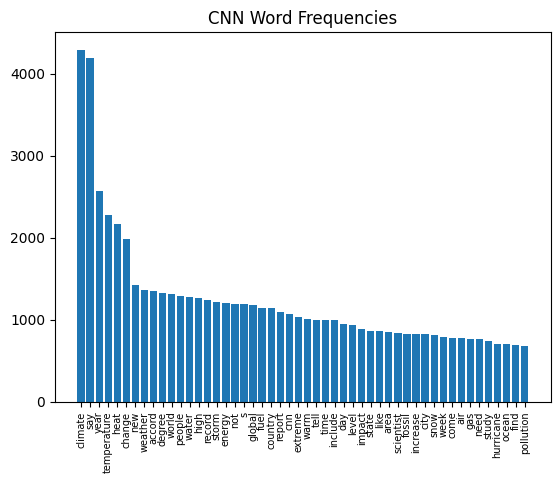

In [ ]:
# Visualize word frequencies for CNN
plot_word_frequencies(cnn_word_freq, "CNN Word Frequencies")

- The apparent focus of CNN is on climate-related matters, focusing on the usage of terms like "temperature," "energy," and "weather."
- The terms "change" and "impact" give some hint of focusing on discussing the effects brought about by climate change and environmental policies.

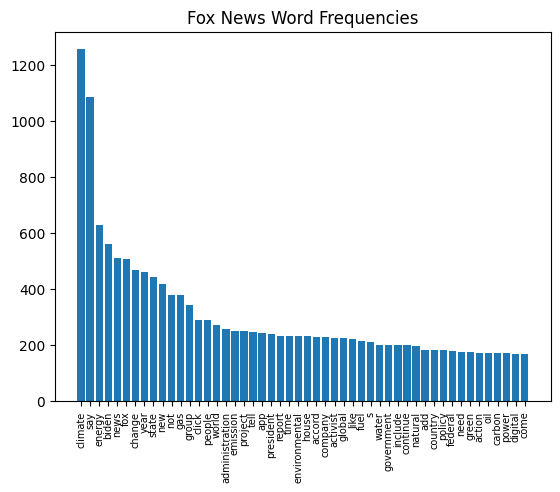

In [ ]:
# Visualize word frequencies for Fox News
plot_word_frequencies(fox_word_freq, "Fox News Word Frequencies")

- Fox News features the political and economic perspectives of climate-related issues. The occurrence of terms like "policy," "administration," and "government" indicates the politically framed coverage of topics.
- Terms like "energy" and "economic" reflect a focus on the economic implications of environmental policies, consistent with conservative political narratives.

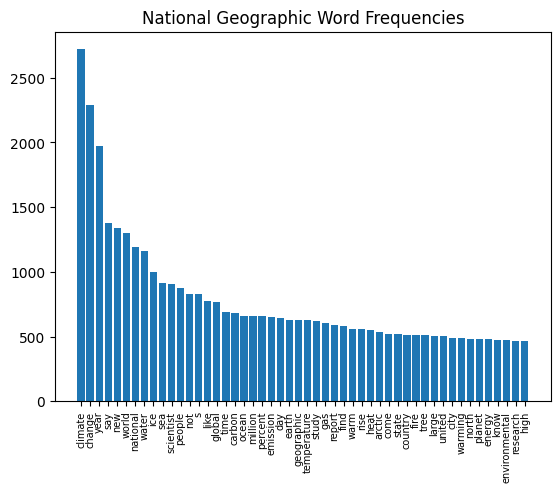

In [ ]:
# Visualize word frequencies for National Geographic
plot_word_frequencies(natgeo_word_freq, "National Geographic Word Frequencies")

- National Geographic underlines scientific and ecological aspects: the terms "species," "wildlife," and "natural" draw attention to biodiversity and conservation.
- The presence of such words as "science" and "research" underlines the educational and scientific approach to the issues of ecology.

The conclusion of this inspection is that CNN takes a balanced environmental approach to climate change.
Fox News approaches the issue from the perspective of politics and economy.
National Geographic focuses on scientific and ecological exploration.

### Named Entity Recognition

Let's go on to do our second analysis, Named Entity Recognition (NER).

Named Entity Recognition is a subtask of Natural Language Processing (NLP) that identifies and classifies key information in text into predefined categories, such as persons, organizations, locations, dates, and more. Named Entity Recognition  works on Doc objects. A Doc object is created by processing text through a spaCy language model, and it contains annotations such as named entities, part-of-speech tags, and syntactic dependencies. You can access the named entities in a Doc object using the **.ents** attribute, which returns a list of entities, and each entity has a **.text** (the entity's text) and a **.label**_ (the entity's category, such as "PERSON," "ORG," "GPE," etc.).

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to process the text into Doc objects
def process_texts_to_docs(texts):
    return [nlp(text) for text in texts]

# Extract Named Entities
def extract_named_entities(docs):
    return [(ent.text, ent.label_) for doc in docs for ent in doc.ents]

# Process the 'Processed_Content' column into Doc objects for all datasets
cnn_docs = process_texts_to_docs(cnn['Processed_Content'])
fox_docs = process_texts_to_docs(fox['Processed_Content'])
natgeo_docs = process_texts_to_docs(natgeo['Processed_Content'])

# Extract named entities
cnn_entities = extract_named_entities(cnn_docs)
fox_entities = extract_named_entities(fox_docs)
natgeo_entities = extract_named_entities(natgeo_docs)


First, let's see which persons are most frequently mentioned in each of the datasets.

In [ ]:
from collections import Counter

# Extract named persons
def extract_person_entities(docs):
    return [ent.text for doc in docs for ent in doc.ents if ent.label_ == "PERSON"]

# Extract named persons
def extract_person_entities(docs):
    return [ent.text for doc in docs for ent in doc.ents if ent.label_ == "PERSON"]

# Extract named persons from each dataset
cnn_persons = extract_person_entities(cnn_docs)
fox_persons = extract_person_entities(fox_docs)
natgeo_persons = extract_person_entities(natgeo_docs)

# Count the most common persons for each dataset
cnn_person_freq = Counter(cnn_persons).most_common(10)  # Top 10 for CNN
fox_person_freq = Counter(fox_persons).most_common(10)  # Top 10 for Fox
natgeo_person_freq = Counter(natgeo_persons).most_common(10)  # Top 10 for National Geographic

Let's create a bar plot to visualize the most frequently mentioned persons.

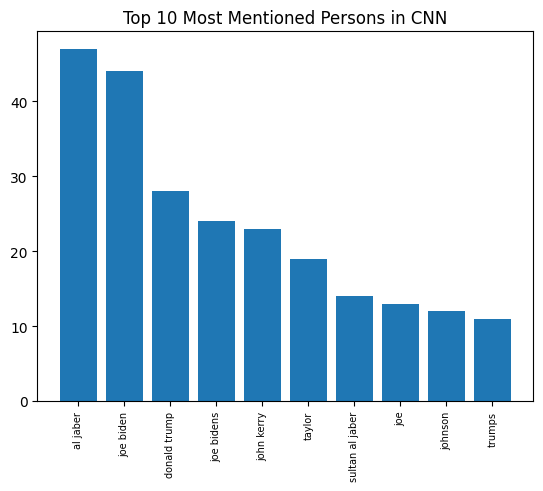

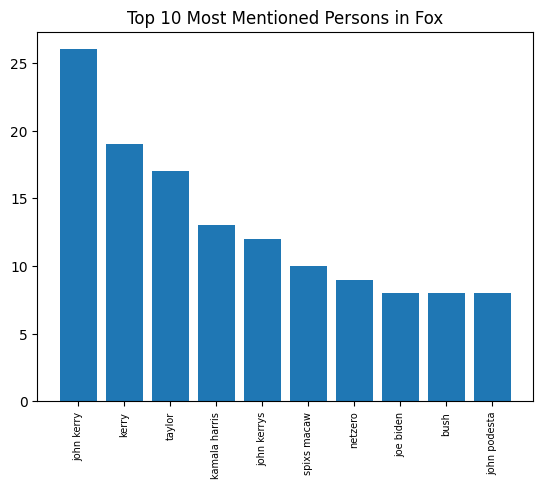

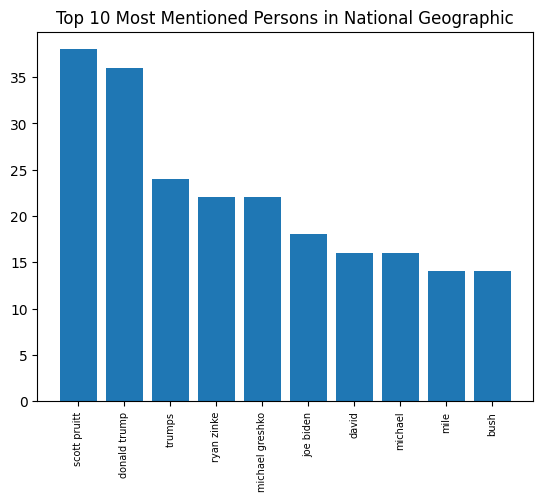

In [ ]:
import matplotlib.pyplot as plt

# Function to plot most mentioned persons
def plot_person_frequencies(person_freq, title):
    persons, counts = zip(*person_freq)  # Separate persons and their counts
    plt.bar(persons, counts)  # A bar chart
    plt.title(title)
    plt.xticks(rotation=90, fontsize=7)  # Rotate the labels for readability
    plt.show()

# Visualize the top 10 most mentioned persons for each dataset
plot_person_frequencies(cnn_person_freq, "Top 10 Most Mentioned Persons in CNN")
plot_person_frequencies(fox_person_freq, "Top 10 Most Mentioned Persons in Fox")
plot_person_frequencies(natgeo_person_freq, "Top 10 Most Mentioned Persons in National Geographic")



These visualizations show some interesting trends:

*   CNN: Broad Political and Climate Coverage

CNN’s list prominently features U.S. political figures, with "Joe Biden," "Donald Trump," and "John Kerry" among the most mentioned. However, "Al Jaber" tops the list, which reflects CNN's emphasis on global climate issues. Al Jaber, the UAE's special envoy for climate change and president of the COP28 climate talks, likely appears frequently due to CNN’s coverage of international climate negotiations. This focus aligns with CNN’s broader interest in both U.S. and global political and environmental stories.
*   Fox News: Heavy Focus on Democratic Figures

Fox News’s mentions are dominated by Democratic politicians, including "John Kerry," "Kamala Harris," and "Joe Biden," while mentions of Republican figures like "Donald Trump" are not appearing in the top 10 most mentioned persons. This reflects Fox News’s editorial strategy of critiquing Democratic leaders, particularly on issues such as climate policies. The selective focus on Democratic figures aligns with the outlet’s audience preferences for challenging liberal policies.


*   National Geographic: Environmental and Political Blend

National Geographic’s list combines political figures, such as "Donald Trump," "Joe Biden," and "Ryan Zinke," with individuals tied to environmental policies, like "Scott Pruitt." The high frequency of "Donald Trump" likely reflects coverage of his administration’s environmental policies rather than broader political narratives. This balance between environmental and political reporting underscores National Geographic’s dual focus on science, conservation, and policy impacts.

Now let's move on to analyze the most frequently mentioned organizations by each of the news outlets.

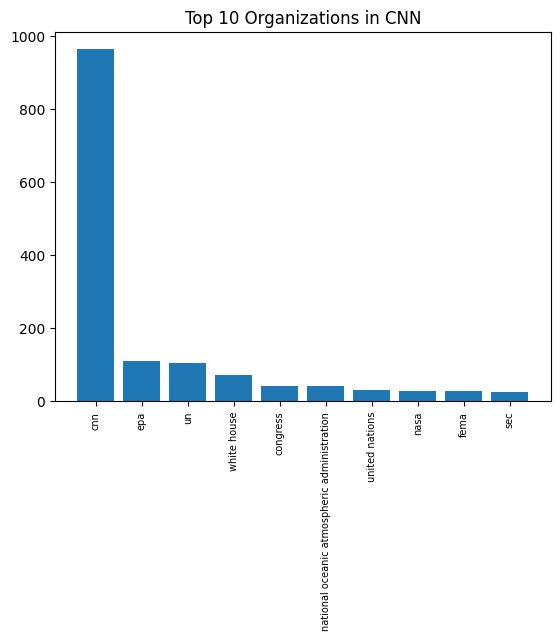

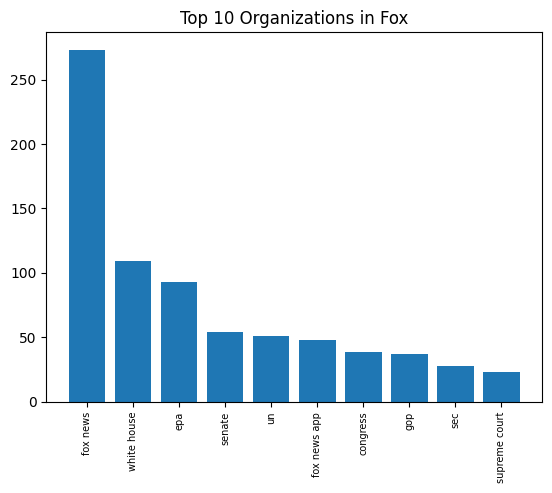

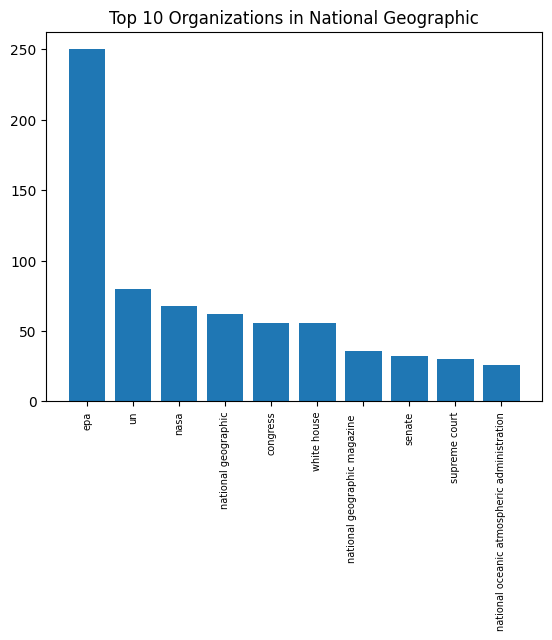

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to extract organizations
def extract_organizations(docs):
    organizations = []
    for doc in docs:
        for ent in doc.ents:
            if ent.label_ == "ORG":  # Looking for organization entities
                organizations.append(ent.text)
    return organizations

# Function to plot organization frequencies
def plot_org_frequencies(org_freq, title):
    organizations, counts = zip(*org_freq)  # Separate organizations and their counts
    plt.bar(organizations, counts)  # A bar chart
    plt.title(title)
    plt.xticks(rotation=90, fontsize=7)  # Rotate the labels for readability
    plt.show()

# Extract organizations for each dataset
cnn_orgs = extract_organizations(cnn_docs)
fox_orgs = extract_organizations(fox_docs)
natgeo_orgs = extract_organizations(natgeo_docs)

# Count the most common organizations for each dataset
cnn_org_freq = Counter(cnn_orgs).most_common(10)  # Top 10 organizations for CNN
fox_org_freq = Counter(fox_orgs).most_common(10)  # Top 10 organizations for Fox
natgeo_org_freq = Counter(natgeo_orgs).most_common(10)  # Top 10 organizations for National Geographic

# Plotting the most mentioned organizations for each dataset
plot_org_frequencies(cnn_org_freq, "Top 10 Organizations in CNN")
plot_org_frequencies(fox_org_freq, "Top 10 Organizations in Fox")
plot_org_frequencies(natgeo_org_freq, "Top 10 Organizations in National Geographic")


CNN prominently mentions its own brand ("CNN"), but beyond that, the focus is on governmental and international organizations such as the "EPA," "UN," and "White House."
The high frequency of "EPA" (Environmental Protection Agency) and "National Oceanic Atmospheric Administration" reflects CNN's emphasis on climate change, environmental policies, and scientific institutions.

Fox News also frequently mentions "White House" and "EPA," but its focus skews towards entities tied to domestic politics, such as "Senate," "Congress," "GOP," and "Supreme Court."
Mentions of "Fox News" and "Fox News App" reflect self-promotion and branding.
The presence of "GOP" (Republican Party) suggests Fox News’s alignment with conservative political narratives and its coverage of Republican strategies in governance.

For National Geographic, the "EPA" is the most mentioned organization, emphasizing its focus on environmental and conservation-related policies.
Other science-related organizations like "NASA" and "National Oceanic Atmospheric Administration" are prominent, consistent with National Geographic's commitment to covering topics like climate change and space exploration.
While environmental organizations dominate, mentions of "Congress" and "White House" indicate National Geographic's coverage of how political decisions intersect with environmental issues.

### Sentiment Analysis

Now, lets do a sentiment analysis using textblob. A textblob sentiment analysis looks at polarity and subjectivity. It allows us to look at the tone and determine whether it is positive, negative or neutral. The sentiment function in TextBlob returns a tuple of the form (polarity, subjectivity). The polarity score is within the range [-1.0, 1.0]. The subjectivity is within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. Now lets do a sentiment analysis for National Geographic, Fox News and CNN seperately.

In [ ]:
# Calculate the polarity with lambda
natgeo['polarity'] = natgeo.Text.apply(lambda x: TextBlob(x).polarity)
# Calculate the subjectivity with lambda
natgeo['subjectivity'] = natgeo.Text.apply(lambda x: TextBlob(x).subjectivity)
# Now calculate the sentiment analysis where a score over 0 is a positive analysis, and a score below 0 is neutral or negative,
# and do the same for three other articles.
natgeo['sentiment'] = np.where(natgeo.polarity > 0, 'positive',
                            np.where(natgeo.polarity < 0, 'negative', 'neutral'))

natgeo.head()

,Title,URL,Date,Description,Text,Processed_Content,polarity,subjectivity,sentiment
0,'Biggest case on the planet' pits kids vs. cli...,https://www.nationalgeographic.com/science/art...,11-09-2018,A pioneering lawsuit against the U.S. governme...,"On January 17, 2020, a federal appeals court t...",january federal appeal court throw case jul...,0.092068,0.518506,positive
1,'Extreme Weather' Film Connects Nature's Fury ...,https://www.nationalgeographic.com/science/art...,10-13-2016,Filmmaker behind new IMAX documentary also sha...,Hear the rumble of ice blocks shearing off the...,hear rumble ice block shear edge glacier destr...,0.043457,0.514050,positive
2,'Lost Continent' Expedition Provides Clues to ...,https://www.nationalgeographic.com/science/art...,09-27-2017,A team of scientists set out to study the regi...,"So far, we don't know much about the world's d...",far not know world dispute lose continent grou...,0.075000,0.462500,positive
3,'Society of the Snow' would’ve gone differentl...,https://www.nationalgeographic.com/environment...,02-20-2024,Snowfall is declining in the drought-stricken ...,"The plane crashed into the Andes, lost its win...",plane crash ande lose wing tail slide foot h...,0.050000,0.191667,positive
4,'This Is Really Extreme Science': Adrift in th...,https://www.nationalgeographic.com/science/art...,02-24-2015,Our correspondent reports from a Norwegian res...,"R.V. LANCE, 82.6 Degrees North—Curious polar b...",rv lance degree northcurious polar bear vent...,0.072064,0.395597,positive


In [ ]:
# Print the counts for all the positive, negative and neutral sentiments
print(natgeo['sentiment'].value_counts())

sentiment
positive    978
negative    312
neutral      20
Name: count, dtype: int64


It seems that the sentiment is mostly positive. When looking at the subjectivity, the score seems relativily high. This could mean that the overal sentiment is actually very subjective, which is oppositve from what we had expected, as National Geographic is described as a mainly objective outlet for news. The negative sentiment is actually quite high, higher than the other news outlets which will be discussed below. As National Geographic is marketed to be a more scientific based outlets, it relies less on sensationalism and more on scientific based news. This could mean that they are less afraid to use negative language around climate change and also climate change politics.

In [ ]:
cnn['Text'] = cnn['Text'].fillna("").astype(str)

cnn['polarity'] = cnn.Text.apply(lambda x: TextBlob(x).polarity)
cnn['subjectivity'] = cnn.Text.apply(lambda x: TextBlob(x).subjectivity)
cnn['sentiment'] = np.where(cnn.polarity > 0, 'positive',
                                 np.where(cnn.polarity < 0, 'negative', 'neutral'))

cnn.head()

,URL,Title,Date,Description,Author,Text,Processed_Content,polarity,subjectivity,sentiment
0,https://www.cnn.com/2022/04/11/weather/2022-at...,2022 Atlantic Hurricane Season Fast Facts,10-23-2024,...,CNN Editorial Research,Here is a look at the 2022 Atlantic hurricane ...,look atlantic hurricane season follow storm ...,0.050000,0.370437,positive
1,https://www.cnn.com/2022/09/16/us/plastic-recy...,Single-use plastic is wreaking havoc on the pl...,04-22-2023,...,"Rachel Ramirez, CNN","Editor’s Note: Sign up for CNN’s Life, But Gre...",editor note sign cnns life green newsletter se...,0.086200,0.567256,positive
2,https://www.cnn.com/2022/11/16/world/ways-to-s...,Saving water can help us deal with the climate...,02-24-2023,...,"Kristen Rogers, CNN","Editor’s Note: Sign up for CNN’s Life, But Gre...",editor note sign cnns life green newsletter li...,0.088075,0.437368,positive
3,https://www.cnn.com/2023/01/03/europe/europe-h...,‘Uncharted territory’: January heat records sm...,01/03/2023,...,"Christian Edwards, CNN",The year has only just started but already Eur...,year start europe break alarming number weathe...,0.156213,0.535328,positive
4,https://www.cnn.com/2023/01/04/us/california-s...,California braces for more ‘brutal’ flooding a...,01/04/2023,...,"Rachel Ramirez, CNN",Parts of drought-plagued California are facing...,part droughtplagued california face onslaught ...,0.049909,0.476196,positive


In [ ]:
print(cnn['sentiment'].value_counts())

sentiment
positive    634
negative     49
neutral       1
Name: count, dtype: int64


CNN scores rather high on the positive sentiment, with only a score of 49 for a negative sentiment. This could indicate that CNN uses a lot of positive language, much more compared to National Geographic, which had a much higher score for the negative sentiment. However, compared to National Geographic, CNN is a news outlet that relies less on scientific evidence than National Geographic. NatGEO is more of a scientific based outlet. One thing that stands out is that the neutral count is very low, at only 1. This means that CNN is perhaps not as neutral as they'd like to market themselves to be.

In [ ]:
fox['Text'] = fox['Text'].fillna("").astype(str)

fox['polarity'] = fox.Text.apply(lambda x: TextBlob(x).polarity)
fox['subjectivity'] = fox.Text.apply(lambda x: TextBlob(x).subjectivity)
fox['sentiment'] = np.where(fox.polarity > 0, 'positive',
                                 np.where(fox.polarity < 0, 'negative', 'neutral'))

fox.head()

,URL,Title,Date,Description,Text,Processed_Content,polarity,subjectivity,sentiment
0,https://www.foxnews.com/health/cdc-warns-extre...,CDC warns of extreme heat dangers amid ‘record...,04-19-2024,Many regions across the U.S. experienced “reco...,Many regions across the United States experien...,region united states experience recordbreake h...,0.086962,0.518794,positive
1,https://www.foxnews.com/health/rare-tick-borne...,Rare tick-borne babesiosis disease on the rise...,03-17-2023,"The CDC reported that cases of babesiosis, a p...",Lyme disease may hold the distinction of being...,lyme disease hold distinction commonly report ...,0.081398,0.515393,positive
2,https://www.foxnews.com/lifestyle/about-indian...,"If you live in the northern hemisphere, don't ...",10/08/2023,Indian summer typically occurs in late October...,When the leaves start changing and the days ge...,leave start change day short colder weather wa...,0.200748,0.500637,positive
3,https://www.foxnews.com/lifestyle/can-you-tell...,Can you really tell a tree’s age from the ring...,01-21-2024,Exploration of the great outdoors includes a f...,,,0.000000,0.000000,neutral
4,https://www.foxnews.com/lifestyle/how-ai-machi...,How AI and machine learning are revealing food...,07-13-2023,"Winnow, a food waste solution company, develop...",Food waste makes up an estimated 30% to 40% of...,food waste make estimate food supply accor...,0.086667,0.330120,positive


In [ ]:
print(fox['sentiment'].value_counts())

sentiment
positive    208
negative     42
neutral      38
Name: count, dtype: int64


Compared to CNN, Fox News has a higher neutral score even though Fox News is often commented to be a biased outlet that denies climate change. However, the positive sentiment is a lot higher than the negative sentiment, even though we saw in the NER that Fox News is very focused on attacking Democratic politicians and denying climate change. This positive sentiment could be that they use a lot of positive language to agree with Repulican leaders that deny climate change. A positive sentiment does not necessarily include a positive sentiment around climate change.

Now, let's combine all the textblob sentiment analysis in a new dataframe to compute a sentiment analysis for all the three sources combined:

In [ ]:
# Create a new dataframe by using pandas concat. Next, apply the polarity and sentiment analysis to the combinaed dataframe of the three.
all_climate = pd.concat([cnn, natgeo, fox], ignore_index=True)

all_climate['Text'] = all_climate['Text'].fillna("").astype(str)

all_climate['polarity'] = all_climate['Text'].apply(lambda x: TextBlob(x).polarity)
all_climate['subjectivity'] = all_climate['Text'].apply(lambda x: TextBlob(x).subjectivity)

# Classify sentiment based on polarity
all_climate['sentiment'] = all_climate['polarity'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Create a new csv for the combined sentiment analysis
output_path = "combined_textblob_results.csv"
all_climate.to_csv(output_path, index=False)
# Now print out the positive, negative and neutral sentiment of the newly combined dataframe.
print(all_climate['sentiment'].value_counts())

sentiment
positive    1820
negative     403
neutral       59
Name: count, dtype: int64


Sentiment Counts by Source:
sentiment            negative  neutral  positive
Source                                          
CNN                        49        1       634
Fox News                   42       38       208
National Geographic       312       20       978


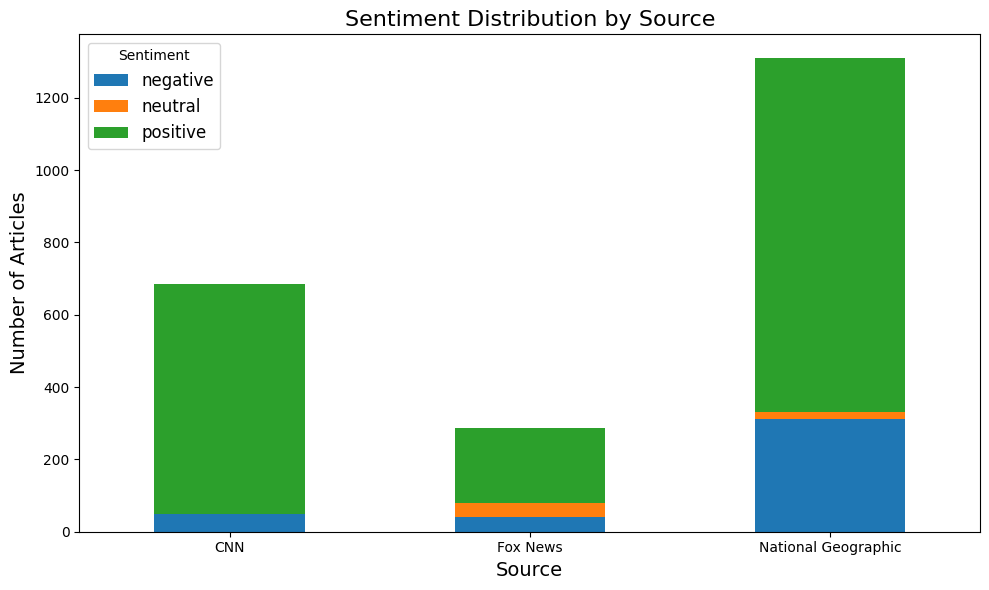

In [ ]:
# Add a 'Source' column to each dataset
cnn['Source'] = 'CNN'
natgeo['Source'] = 'National Geographic'
fox['Source'] = 'Fox News'

# Concatenate the datasets
all_climate = pd.concat([cnn, natgeo, fox], ignore_index=True)
all_climate['Text'] = all_climate['Text'].fillna("").astype(str)

# Calculate polarity and subjectivity
all_climate['polarity'] = all_climate['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
all_climate['subjectivity'] = all_climate['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Classify sentiment based on polarity
all_climate['sentiment'] = all_climate['polarity'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Group sentiment counts by source
sentiment_counts = all_climate.groupby('Source')['sentiment'].value_counts().unstack()

# Print the results
print("Sentiment Counts by Source:")
print(sentiment_counts)

# Plot the sentiment distribution for each source
sentiment_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Sentiment Distribution by Source', fontsize=16)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

From what we can see after combining all three websites and plotting the graph, is that there is a much higher positive sentiment than a negative sentiment in the articles. This does not mean that all three news outlets have a positive feeling about climate change. A more correct assumption is that they write what their audience wants to read. So, CNN might talk more positively about Democrats and Fox might talk more positively about Republicans. National Geographic might use positive language about measures taken to fight climate change, and so might CNN. This does not mean the news outlets view climate change in a positive sight, rather it is the language that is used to talk about climate change that curated positive, negative or neutral sentiments. However, it is surprising that National Geographic uses a much more negative tone than CNN and Fox News, as it could've been the other way around. For Fox News, their neutrality is higher than CNN and National Geographic, which could give the impression that Fox News is more neutral than CNN.

In [ ]:
df = pd.read_csv("combined_textblob_results.csv")

In [ ]:
#join all texts from the all_climate dataframe
text_data = " ".join(all_climate['Text'])

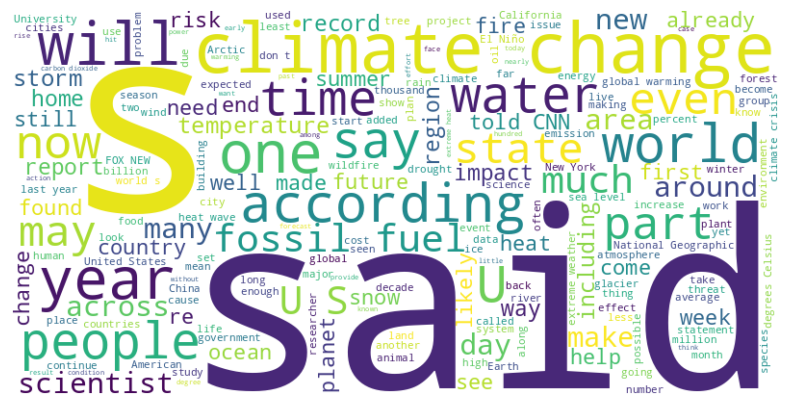

In [ ]:
#plot the wordcloud by using the wordcloud function
wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS  #Remove common stopwords
    ).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

For the wordcloud, we can see that the word mentioned the most in the articles is 'said'. This means that a lot of the articles probably mention someone, by using the verb 'said'. Other words that are mentioned a lot are climate change, scientist and fossel fuels. These are all keywords when talking about climate change.

### Active Learning Exercises

**Excercise 1: Your challenge is to create a filtered word frequency list to explore the themes!**

Your goal is to filter the word list based on a specific topic or theme. For example:

Filter words related to policy (e.g., "law," "regulation," "government").
Filter words related to science (e.g., "study," "data," "research").

_Task:_
Create a new word frequency dictionary for the filtered theme.
Visualize the results with a bar chart.

In [ ]:
# Example: Filter for policy-related words
policy_words = []

def filter_word_frequencies( , ):

# Your code here

**Exercise 2: Visualize and analyze most frequently named events**

The goal of this exercise is to visualize which events are most often named in each of the three news outlets.

Hint: look at the code for extracting and visualizing most named Persons and Organizations

Also think about why it would be interesting to look at the most often named events.

In [ ]:
# Function to extract events
def extract_events(docs):
    events = []
    for doc in docs:
        for ent in doc.ents:
            if ent.label_ == # Your code here
                events.append(ent.text)
    return events

# Function to plot event frequencies
def plot_event_frequencies(event_freq, title):
    events, counts = zip(*event_freq)  # Separate events and their counts
    plt.bar(events, counts)  # A bar chart
    plt.title(title)
    plt.xticks(rotation=90, fontsize=7)  # Rotate the labels for readability
    plt.show()

# Extract events for each dataset
cnn_events = # Your code here
fox_events = # Your code here
natgeo_events = # Your code here

# Count the most common events for each dataset
cnn_event_freq = Counter(cnn_events).most_common(10)  # Top 10 events for CNN
fox_event_freq = Counter(fox_events).most_common(10)  # Top 10 events for Fox
natgeo_event_freq = Counter(natgeo_events).most_common(10)  # Top 10 events for National Geographic

# Plotting the most mentioned events for each dataset
plot_event_frequencies(cnn_event_freq, # Your code here)
plot_event_frequencies(fox_event_freq, # Your code here)
plot_event_frequencies(natgeo_event_freq, # Your code here)


What do these visualizations tell us? Are there important differences in the most frequently named events between the news outlets? Do these results suprise you or are they in line with your expectations?

In [ ]:
#Your answer here

**Exercise 3: Visualize sentiment analysis**

The goal of this exercise is to try to visualize the sentiment analysis for the comebined dataframe.

Visualize the sentiment analysis with a barplot.


In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot () #add code here